Dataset Upload and Initialization

In [ ]:
import os
import zipfile
import shutil
import random

def setup_and_prepare_dataset(zip_path, upload_dir='dataset'):
    """
    Extract the Vehicles.zip file and prepare train, validation, and test splits.
    """
    try:
        # Check if the ZIP file exists
        if not os.path.exists(zip_path):
            raise FileNotFoundError(f"File not found at path: {zip_path}")

        # Create a directory for the dataset
        dataset_dir = os.path.join(upload_dir, 'data')
        os.makedirs(dataset_dir, exist_ok=True)

        # Extract the ZIP file
        print(f"Extracting {zip_path}...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(dataset_dir)

        print(f"✓ Successfully extracted files to {dataset_dir}")

        # Now the dataset directory has a structure like /content/dataset/data/vehicle_type
        # Modify to reflect correct folder structure: Vehicles/car, Vehicles/bus, etc.

        vehicle_classes = ['car', 'bus', 'motorcycle', 'truck']

        # Create train, validation, and test directories
        train_dir = os.path.join(upload_dir, 'train')
        validation_dir = os.path.join(upload_dir, 'validation')
        test_dir = os.path.join(upload_dir, 'test')

        for split_dir in [train_dir, validation_dir, test_dir]:
            os.makedirs(split_dir, exist_ok=True)
            for cls in vehicle_classes:
                os.makedirs(os.path.join(split_dir, cls), exist_ok=True)

        # Prepare to split into train, validation, and test directories (70%, 20%, 10%)
        split_ratios = {'train': 0.7, 'validation': 0.2, 'test': 0.1}

        # Iterate through each class and split data
        for cls in vehicle_classes:
            cls_dir = os.path.join(dataset_dir, cls)
            all_files = os.listdir(cls_dir)
            random.shuffle(all_files)

            train_split = int(len(all_files) * split_ratios['train'])
            validation_split = train_split + int(len(all_files) * split_ratios['validation'])

            splits = {
                'train': all_files[:train_split],
                'validation': all_files[train_split:validation_split],
                'test': all_files[validation_split:]
            }

            for split, split_files in splits.items():
                split_cls_dir = os.path.join(upload_dir, split, cls)
                for file in split_files:
                    shutil.move(os.path.join(cls_dir, file), os.path.join(split_cls_dir, file))

        # Remove the original extracted dataset folder
        shutil.rmtree(dataset_dir)

        print(f"\nDataset preparation completed. The dataset is organized at: {upload_dir}")

        # Verifying dataset structure
        for split in ['train', 'validation', 'test']:
            for cls in vehicle_classes:
                print(f"  {split}/{cls}: {len(os.listdir(os.path.join(upload_dir, split, cls)))} images")

        return True

    except Exception as e:
        print(f"\n❌ Error: {str(e)}")
        return False

# Example usage:
zip_path = '/content/Vehicles.zip'
if setup_and_prepare_dataset(zip_path):
    print("\nDataset is ready to use!")


Main Code

Verified directory: dataset/train
Verified directory: dataset/validation
Verified directory: dataset/test
Found 1277 images belonging to 4 classes.
Found 364 images belonging to 4 classes.
Found 186 images belonging to 4 classes.

Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50v2 (Functional)              │ (None, 2048)                │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,626,180 (93.94 MB)

 Trainable params: 1,056,260 (4.03 MB)

 Non-trainable params: 23,569,920 (89.91 MB)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6870 - loss: 0.8189
Epoch 1: val_accuracy improved from -inf to 0.92582, saving model to model_saves_20250217_090910/checkpoints/model_epoch01_val_acc0.9258.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.6895 - loss: 0.8132 - val_accuracy: 0.9258 - val_loss: 0.2228 - learning_rate: 0.0010
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.8754 - loss: 0.3333
Epoch 2: val_accuracy did not improve from 0.92582
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 394ms/step - accuracy: 0.8759 - loss: 0.3318 - val_accuracy: 0.9231 - val_loss: 0.2129 - learning_rate: 0.0010
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.8954 - loss: 0.2649
Epoch 3: val_accuracy did not improve from 0.92582
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 493ms/step - accuracy: 0.8953 - loss: 0.2651 - val_accuracy: 0.9176 - val_loss: 0.2330 - learning_rate: 0.0010
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.9041 - los

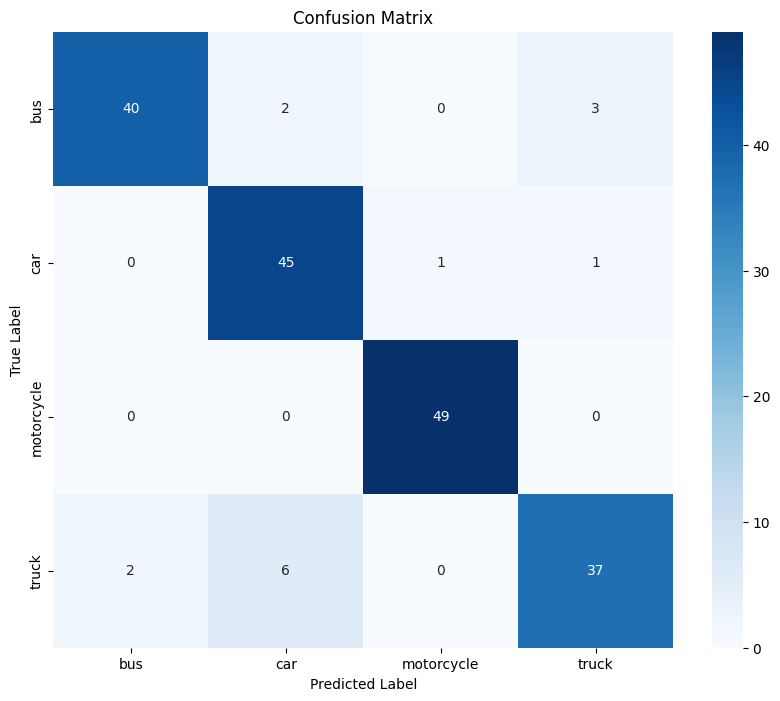


Classification Report:
              precision    recall  f1-score   support

         bus       0.95      0.89      0.92        45
         car       0.85      0.96      0.90        47
  motorcycle       0.98      1.00      0.99        49
       truck       0.90      0.82      0.86        45

    accuracy                           0.92       186
   macro avg       0.92      0.92      0.92       186
weighted avg       0.92      0.92      0.92       186

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━

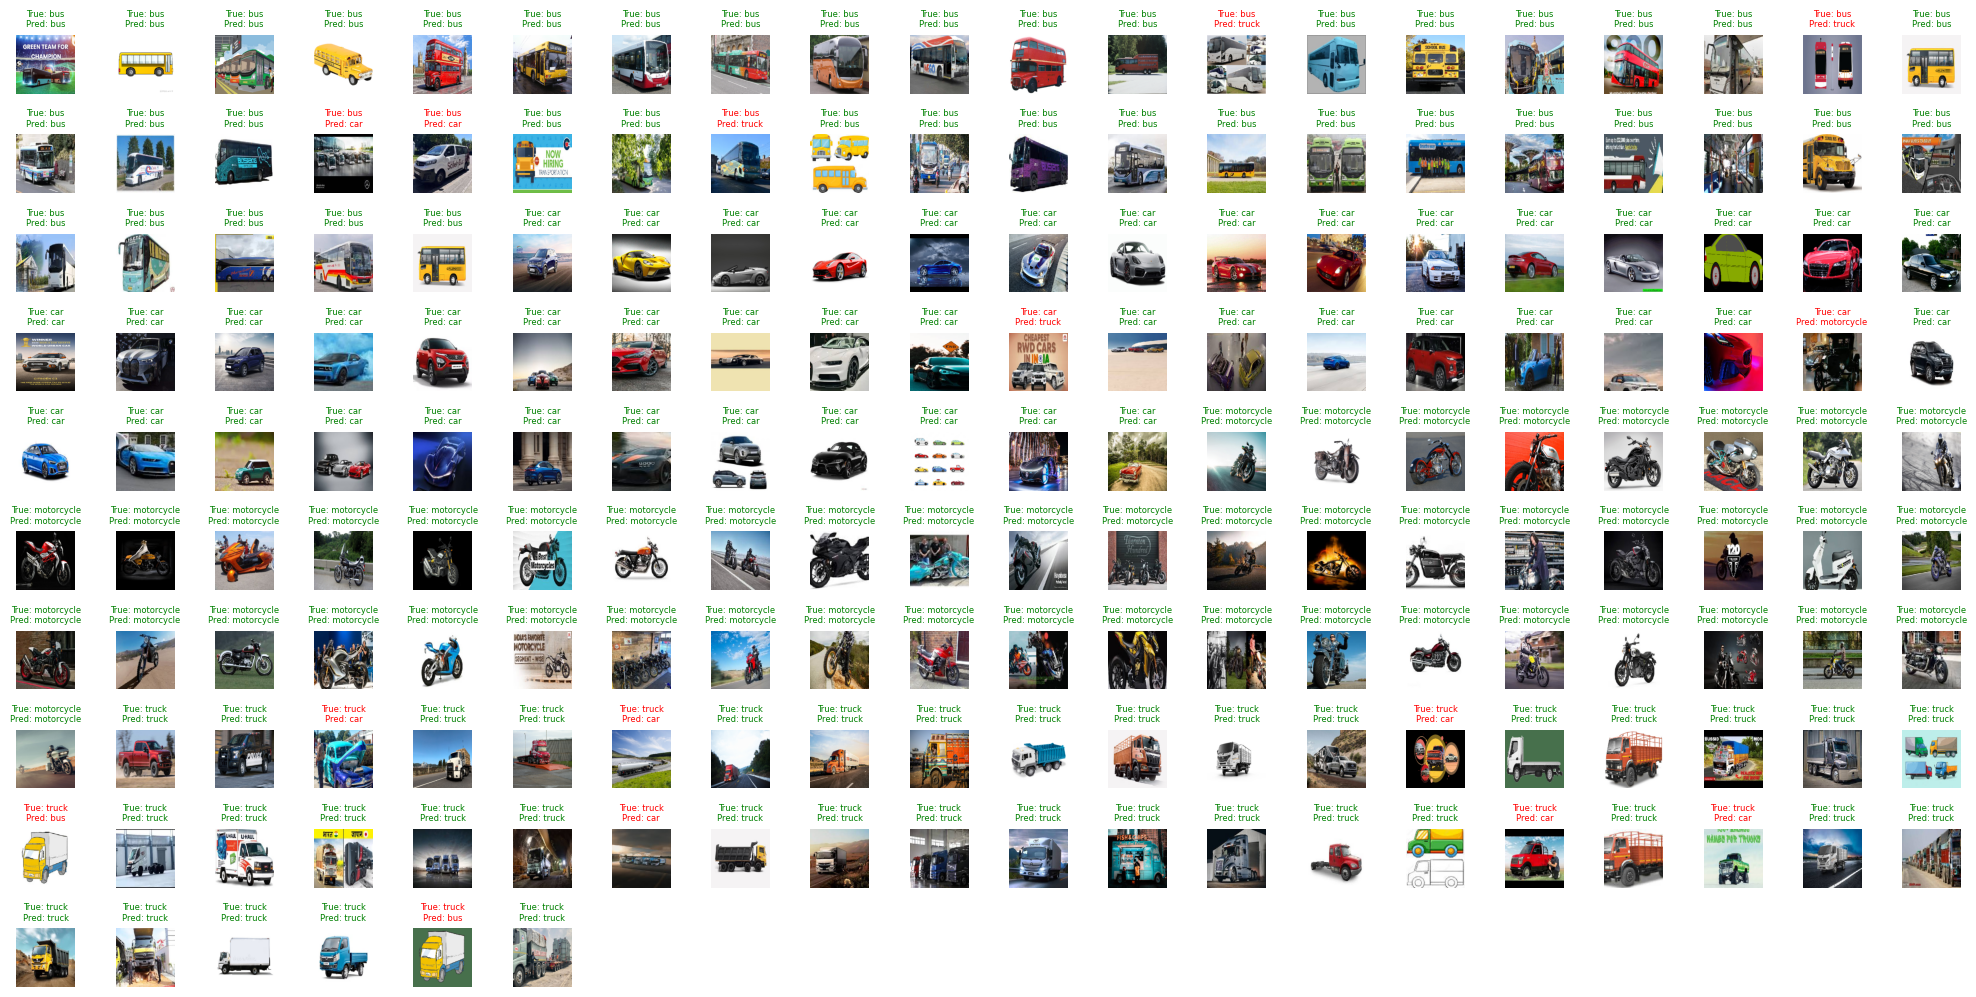

In [1]:
import os
import json
import datetime
import warnings
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

warnings.filterwarnings("ignore")
tf.get_logger().setLevel('ERROR')

# Setup model saving and callbacks
def setup_model_saving():
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    save_dir = f'model_saves_{timestamp}'
    os.makedirs(save_dir, exist_ok=True)
    checkpoint_path = os.path.join(save_dir, 'checkpoints')
    os.makedirs(checkpoint_path, exist_ok=True)

    return save_dir, [
        ModelCheckpoint(
            filepath=os.path.join(checkpoint_path, 'model_epoch{epoch:02d}_val_acc{val_accuracy:.4f}.keras'),
            monitor='val_accuracy',
            mode='max',
            save_best_only=True,
            verbose=1
        ),
        CSVLogger(os.path.join(save_dir, 'training_log.csv')),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            verbose=1
        ),
        EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True,
            verbose=1
        ),
        TensorBoard(log_dir=os.path.join(save_dir, 'logs'))
    ]

# Data generation for training, validation, and testing
def create_data_generators():
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.3,  # Increased zoom range
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2
    )
    valid_test_datagen = ImageDataGenerator(rescale=1./255)
    return train_datagen, valid_test_datagen

def setup_data_generators(base_dir, target_classes, batch_size, img_size):
    train_dir = os.path.join(base_dir, 'train')
    validation_dir = os.path.join(base_dir, 'validation')
    test_dir = os.path.join(base_dir, 'test')

    for directory in [train_dir, validation_dir, test_dir]:
        if not os.path.isdir(directory):
            raise FileNotFoundError(f"Directory '{directory}' not found")
        print(f"Verified directory: {directory}")

    train_datagen, valid_test_datagen = create_data_generators()

    generators = {}
    generators['train'] = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical',
        classes=target_classes,
        shuffle=True
    )
    generators['validation'] = valid_test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical',
        classes=target_classes,
        shuffle=False
    )
    generators['test'] = valid_test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical',
        classes=target_classes,
        shuffle=False
    )
    return generators

# Model creation with ResNet50V2 as base
def create_model(num_classes, input_shape=(224, 224, 3)):
    base_model = applications.ResNet50V2(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape,
        pooling='avg'
    )

    inputs = layers.Input(shape=input_shape)
    x = base_model(inputs)

    # Add extra layers for complexity
    x = layers.BatchNormalization()(x)
    x = layers.Dense(512, kernel_initializer='he_uniform')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(0.5)(x)  # Increased dropout to combat overfitting

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.base_model = base_model
    base_model.trainable = False  # Freeze base model initially

    return model

# Display confusion matrix and classification report
def display_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes,
                yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=classes))

# Display images with predictions
def display_all_images(generators, model, target_classes):
    test_gen = generators['test']
    test_gen.reset()

    plt.figure(figsize=(20, 20))
    num_images = len(test_gen.filenames)  # Get the total number of test images
    batch_size = test_gen.batch_size

    for i in range(0, num_images, batch_size):
        img_batch, label_batch = next(test_gen)  # Get the next batch of images
        for j in range(img_batch.shape[0]):  # Iterate over each image in the batch
            img = img_batch[j]
            label = label_batch[j]
            pred = model.predict(np.expand_dims(img, axis=0))
            pred_class = target_classes[np.argmax(pred[0])]
            true_class = target_classes[np.argmax(label)]

            plt.subplot(20, 20, i + j + 1)
            plt.imshow(img)
            color = 'green' if pred_class == true_class else 'red'
            plt.title(f'True: {true_class}\nPred: {pred_class}', color=color, fontsize=6)
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main training function
def train_model():
    BATCH_SIZE = 32
    EPOCHS = 50
    IMG_SIZE = 224
    DATASET_DIR = "dataset"
    target_classes = ['bus', 'car', 'motorcycle', 'truck']

    physical_devices = tf.config.list_physical_devices('GPU')
    if physical_devices:
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)

    save_dir, callbacks = setup_model_saving()
    generators = setup_data_generators(DATASET_DIR, target_classes, BATCH_SIZE, IMG_SIZE)
    model = create_model(len(target_classes), input_shape=(IMG_SIZE, IMG_SIZE, 3))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, clipvalue=1.0),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Model Summary
    print("\nModel Summary:")
    model.summary()

    # Phase 1: Initial Training
    model.fit(
        generators['train'],
        validation_data=generators['validation'],
        epochs=EPOCHS,
        callbacks=callbacks,
        verbose=1
    )

    # Phase 2: Fine-Tuning
    for layer in model.base_model.layers[-30:]:
        layer.trainable = True

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, clipvalue=1.0),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    model.fit(
        generators['train'],
        validation_data=generators['validation'],
        epochs=EPOCHS // 2,
        callbacks=callbacks,
        verbose=1
    )

    # Predictions and Visualizations
    predictions = model.predict(generators['test'])
    pred_classes = np.argmax(predictions, axis=1)
    true_classes = generators['test'].classes

    # Display Confusion Matrix
    display_confusion_matrix(true_classes, pred_classes, target_classes)

    # Display All Images from the Test Set
    display_all_images(generators, model, target_classes)

# Run the training process
if __name__ == "__main__":
    train_model()
